In [2]:
''' Needed libraries '''

import numpy as np # For matrix operations and numerical processing
import matplotlib.pyplot as plt # For plotting
import os, sys # For filepaths
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre

In [3]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [4]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))
print("Dataset shape: ", dataset.shape)

Dataset shape:  (10000, 785)


In [5]:
''' Divide the dataset into images and labels  '''

images = dataset[:, :-1]  # Define the images as all columns except the last one
labels = dataset[:, -1] # Define the labels as the last column

In [6]:
''' Dictionary for the labels '''

labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

In [7]:
# scaling the images
scaler = pre.StandardScaler()
images = scaler.fit_transform(images)

In [8]:
# initialising PCA + applying PCA 
pca = PCA(n_components= 2)
images_transformed = pca.fit_transform(images)
pca.explained_variance_ratio_

array([0.22645698, 0.13673557])

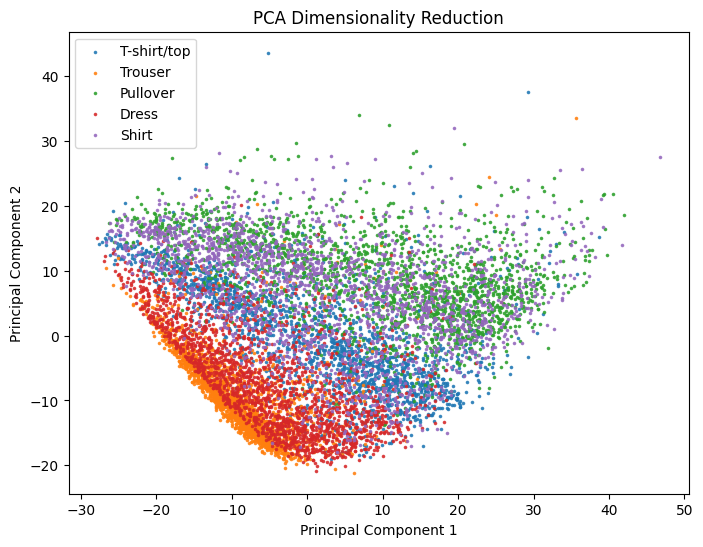

In [9]:
# plotting 
plt.figure(figsize=(8, 6))
for label_value in np.unique(labels):
    indices = np.where(labels == label_value)
    plt.scatter(images_transformed[indices, 0], images_transformed[indices, 1], label=labels_dict[label_value], s=10, alpha=0.8, marker='.', linewidths=1)

plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [10]:
# getting the first 2 principal components 
pca.components_

array([[5.82637304e-04, 2.30631247e-03, 2.34926124e-03, ...,
        1.33195002e-02, 5.81313508e-03, 1.05615622e-03],
       [9.84719107e-05, 2.29457213e-03, 5.69148193e-03, ...,
        2.04898046e-02, 1.15426244e-02, 5.48839696e-03]])

In [11]:
#Get the components from transforming the original data.
scores = pca.fit_transform(images)
# Reconstruct from the 2 dimensional scores 
reconstruct = pca.inverse_transform(scores)
print(scores.shape)
print(reconstruct.shape)
print(images.shape)


(10000, 2)
(10000, 784)
(10000, 784)


(10000, 784)
(784,)


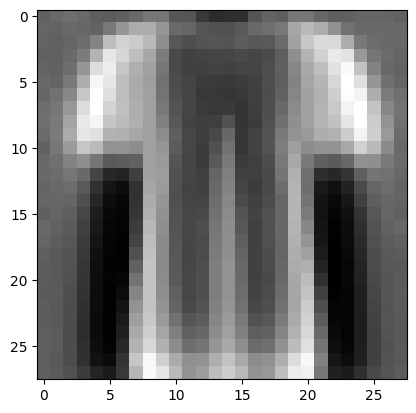

In [12]:
# finding the mean image 
mean_image = np.mean(images[labels==0], axis=0)
print(images.shape)
print(mean_image.shape)
plt.imshow(mean_image.reshape(28, 28), cmap='gray')
plt.show()

In [13]:
def pca_plot(n, index, images): 
    pca = PCA(n_components =n)
    images_transformed = pca.fit_transform(images)
    image_transformed = images_transformed[index]
    # Reconstruct from the 2 dimensional scores 
    reconstructions = pca.inverse_transform(images_transformed)
    reconstruction = reconstructions[index]
    plt.imshow(reconstruction.reshape(28, 28), cmap='gray')


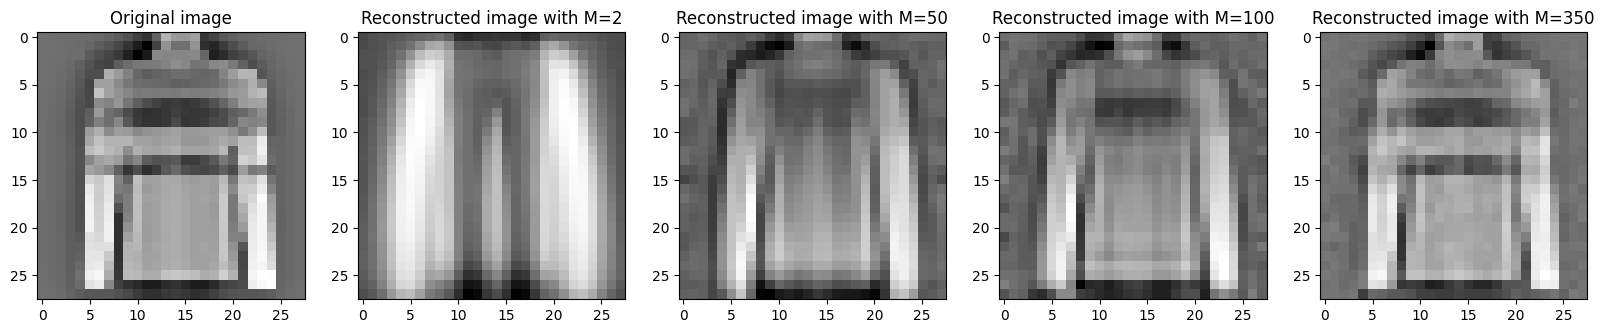

In [14]:
index = 800 
components = [2, 50, 100, 350]
plt.figure(figsize=(20,5))
plt.subplot(1, 5, 1)
plt.title('Original image')
image = images[800]
plt.imshow(image.reshape(28, 28), cmap='gray')

for i in range(len(components)): 
    plt.subplot(1, 5, i+2)
    pca_plot(components[i], index, images)
    plt.title(f'Reconstructed image with M={components[i]}')


(10000, 784)
(784,)


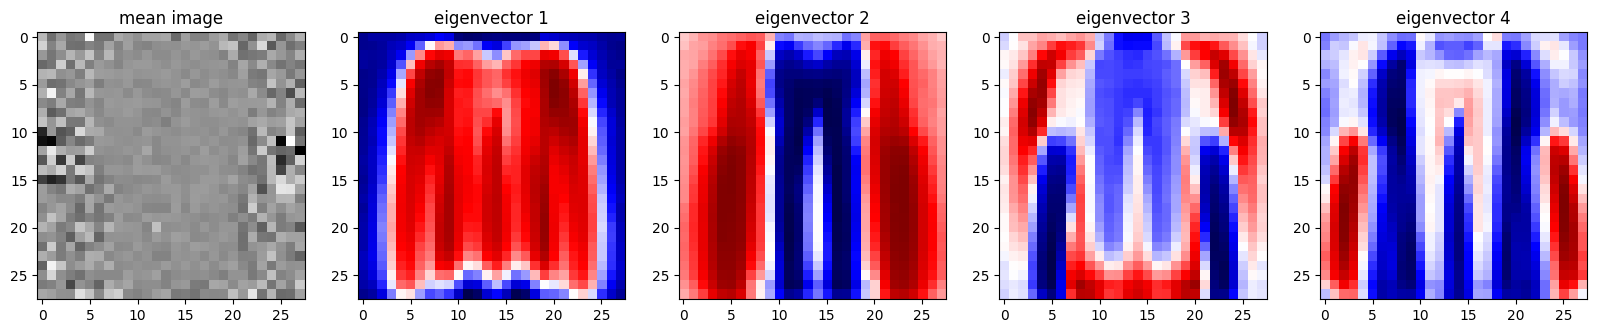

In [17]:
pca_all = PCA(n_components = 784)
images_transformed = pca_all.fit_transform(images)

pca_all.components_

# finding the mean image 

plt.show() 

plt.figure(figsize=(20,5))
plt.subplot(1, 5, 1)
mean_image = np.mean(images, axis=0)
print(images.shape)
print(mean_image.shape)
plt.imshow(mean_image.reshape(28, 28), cmap='gray')
plt.title('mean image')
for i in range(2,6): 
    plt.subplot(1, 5, i)
    plt.imshow(pca_all.components_[i-2].reshape(28, 28), cmap='seismic')
    plt.title(f'eigenvector {i-1}')

# cmap = 'jet'
# cmap = 'seismic'
# cmap = 'grey'

In [16]:
pca.components_[0].reshape(28,28)

array([[ 5.82637305e-04,  2.30631247e-03,  2.34926124e-03,
         2.41525229e-03,  3.03624518e-03,  5.27029802e-03,
         5.83277503e-03,  7.03608428e-03,  1.03431256e-02,
         8.24333091e-03, -1.44369720e-03, -2.62412888e-03,
        -2.03476549e-03, -1.17032610e-03, -5.73972624e-04,
        -1.05316402e-03, -9.99299598e-04, -1.28999520e-03,
        -9.62367961e-04,  6.98455623e-03,  6.18100473e-03,
         4.61317873e-03,  4.16213701e-03,  3.29404039e-03,
         3.12292642e-03,  1.62258455e-03,  9.31059004e-04,
         1.10043695e-03],
       [ 5.19383907e-04,  8.49514198e-04,  1.75936487e-03,
         4.37663796e-03,  5.56392830e-03,  9.53241476e-03,
         1.64598380e-02,  2.65845987e-02,  3.26400868e-02,
         3.14600544e-02,  1.93371470e-02,  1.99682530e-02,
         1.75451867e-02,  9.90194330e-03,  7.53725127e-03,
         1.44111369e-02,  1.97343538e-02,  2.04818319e-02,
         2.27886152e-02,  3.08065025e-02,  2.87429000e-02,
         1.93465317e-02,  1.01

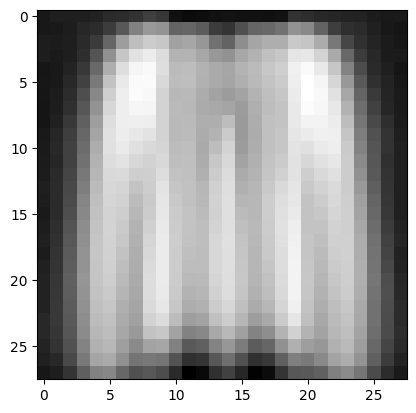

In [263]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
 
# gives range starting from 1 and ending at 3  
range_to_normalize = (0,255)
normalized_pca = normalize(pca.components_[0], 
                                range_to_normalize[0], 
                                range_to_normalize[1])
normalized_pca=np.array(normalized_pca)
plt.imshow(normalized_pca.reshape(28, 28), cmap='gray')
